In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/DL_project-main'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DL_project-main


In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [ ]:
#import dataset
df = pd.read_csv('spaceship-titanic/train.csv').dropna(axis=0,how='any')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df.Transported = df.Transported.replace({True: 1, False: 0})
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

target = 'Transported'

data = [name for name in df.columns if name !=target and name!='Name' and name!='PassengerId']
numeric_data = []
string_data = []
tokenizers = {}

#organize data based on data types
dtypes = dict(df[data].dtypes)

for name in data:
    if str(dtypes[name]) == 'object':
        string_data.append(name)
        
        #create tokenizer
        value_set = sorted(list(set([x if type(x) == str or type(x) == bool else '' for x in df[name]])))
        tokenizer = {token:num for num,token in enumerate(value_set)}
        tokenizers[name] = tokenizer

    else:
        numeric_data.append(name)

#token count for each string feature
n_tokens = {name:len(tokenizer) for name,tokenizer in tokenizers.items()}
#determine network embedding size
n_embeddings = {name:int(np.ceil(np.log(n_token))) for name,n_token in n_tokens.items()}
#create scalers for each numeric feature
scalers = {name:MinMaxScaler(feature_range=(-1.,1.),copy=True) for name in numeric_data}

#scale numeric features
scaled_numeric_data = {name:scalers[name].fit_transform(df[name].to_numpy().copy().reshape(-1,1)).reshape(-1) for name in numeric_data}
scaled_numeric_df = pd.DataFrame(scaled_numeric_data)

#tokenize string features
tokenized_string_data = {name:np.vectorize(tokenizers[name].get)(df[name].to_numpy().copy()) for name in string_data}
tokenized_string_df = pd.DataFrame(tokenized_string_data)

processed_df = scaled_numeric_df.join(tokenized_string_df)

In [ ]:
print(tokenizers.keys())

dict_keys(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'])


In [ ]:
processed_df

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,-0.012658,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0,137,2,0
1,-0.392405,-0.978024,-0.999396,-0.995919,-0.951000,-0.995673,0,0,1823,2,0
2,0.468354,-0.991331,-0.760105,-1.000000,-0.400660,-0.995181,1,0,1,2,1
3,-0.164557,-1.000000,-0.913930,-0.939443,-0.702874,-0.981019,1,0,1,2,0
4,-0.594937,-0.938911,-0.995304,-0.975353,-0.949572,-0.999803,0,0,1825,2,0
...,...,...,...,...,...,...,...,...,...,...,...
6601,0.037975,-1.000000,-0.542549,-1.000000,-0.853356,-0.992722,1,0,134,0,1
6602,-0.544304,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,1,4293,1,0
6603,-0.341772,-1.000000,-1.000000,-0.694442,-0.999911,-1.000000,0,0,4298,2,0
6604,-0.189873,-1.000000,-0.929628,-1.000000,-0.968493,-0.681845,1,0,1778,0,0


In [ ]:
#split data for training and testing
data_split_mask = np.random.rand(len(df)) < 0.8

train_df = processed_df[data_split_mask].reset_index(drop=True)
train_target_df = df[[target]][data_split_mask].reset_index(drop=True)

test_df = processed_df[~data_split_mask].reset_index(drop=True)
test_target_df = df[[target]][~data_split_mask].reset_index(drop=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_df, df[target], random_state=0)

In [ ]:
# search over different model types

C = [1000, 2000]
gamm = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['poly', 'rbf'] #['linear',

SVC_grid = {
    'svc__C': C,
    #'svc__gamma': gamm,
    'svc__kernel': kernel,
}

# Number of trees in random forest
n_estimators = [10, 50, 100] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 10] # [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
RF_grid = {
    'rf__n_estimators': n_estimators,
    'rf__max_features': max_features,
    'rf__max_depth': max_depth,
    'rf__min_samples_split': min_samples_split,
    'rf__min_samples_leaf': min_samples_leaf,
    'rf__bootstrap': bootstrap
}

#C = np.logspace(-8, 8, 50)
C = [1000, 10000, 100000, 150000, 300000]

penalty = ['l2'] # l1 doesn't exist

LR_grid = {
    'lr__C': C,
    'lr__penalty': penalty,
}

k_range = list(range(20, 75))
weights = ['uniform','distance']
metric = ['euclidean','manhattan']

KNN_grid = {
    'knn__n_neighbors': k_range, # I assume you meant "n_neighbors" for "k"
    'knn__weights': weights,
    'knn__metric': metric,
}

params = [SVC_grid, RF_grid, LR_grid, KNN_grid]

In [ ]:
pipe_1 = Pipeline(steps=[('svc', SVC(random_state=0))])
opt = GridSearchCV(
    pipe_1, params[0], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.6931741984414695
test score: 0.7140905619779231
best params: {'svc__C': 2000, 'svc__kernel': 'poly'}


In [ ]:
pipe_2 = Pipeline(steps=[('rf', RandomForestClassifier(random_state=0))])
opt = GridSearchCV(
    pipe_2, params[1], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.8862898610556352
test score: 0.8784069206201237
best params: {'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}


In [ ]:
pipe_3 = Pipeline(steps=[('lr', LogisticRegression(random_state=0))])
opt = GridSearchCV(
    pipe_3, params[2], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.8441388542925408
test score: 0.8038844941231306
best params: {'lr__C': 100000, 'lr__penalty': 'l2'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pipe_4 = Pipeline(steps=[('knn', KNeighborsClassifier())])
opt = GridSearchCV(
    pipe_4, params[3], cv=3, n_jobs=-1, scoring='roc_auc'
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.6503490433290469
test score: 0.6602628651332134
best params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 74, 'knn__weights': 'distance'}


Generator

In [ ]:
from tensorflow.python import keras
from keras.models import Model
from keras.layers import Input,Dense,BatchNormalization,Concatenate,GaussianNoise
from keras.optimizers import Nadam

In [ ]:
#define latent dimension size
latent_dim = int(np.ceil(np.log(len(X_train)*len(processed_df))))

In [ ]:
#input for random seed vecotors
latent_inputs = Input(shape=(latent_dim,),name='latent')
#input for target specification
target_inputs = Input(shape=(2,),name='target')

In [ ]:
inputs = {'latent':latent_inputs,'target':target_inputs}

In [ ]:
net = Concatenate()([latent_inputs,target_inputs])

In [ ]:
for _ in range(2):
    net = Dense(32+len(processed_df), activation='relu',
                kernel_initializer='he_uniform')(net)
    net = BatchNormalization()(net)

In [ ]:
outputs = {}
#numeric data outputs
for name in numeric_data:
    outputs[name] = Dense(1,activation='tanh',
                            kernel_initializer='glorot_uniform',name=name)(net)

In [ ]:
string_nets = Dense(len(string_data),activation='relu',
                        kernel_initializer='he_uniform')(net)
string_nets = BatchNormalization()(string_nets)

In [ ]:
#string data outputs
for name,n_token in n_tokens.items():
    string_net = Dense(n_embeddings[name],activation='relu',
                        kernel_initializer='he_uniform')(string_nets)
    string_net = BatchNormalization()(string_net)
    outputs[name] = Dense(n_token,activation='softmax',
                            kernel_initializer='glorot_uniform',name=name)(net)

In [ ]:
generator = Model(inputs=inputs, outputs=outputs)
generator.compile(loss='categorical_crossentropy',
                      optimizer=Nadam(clipnorm=1.))

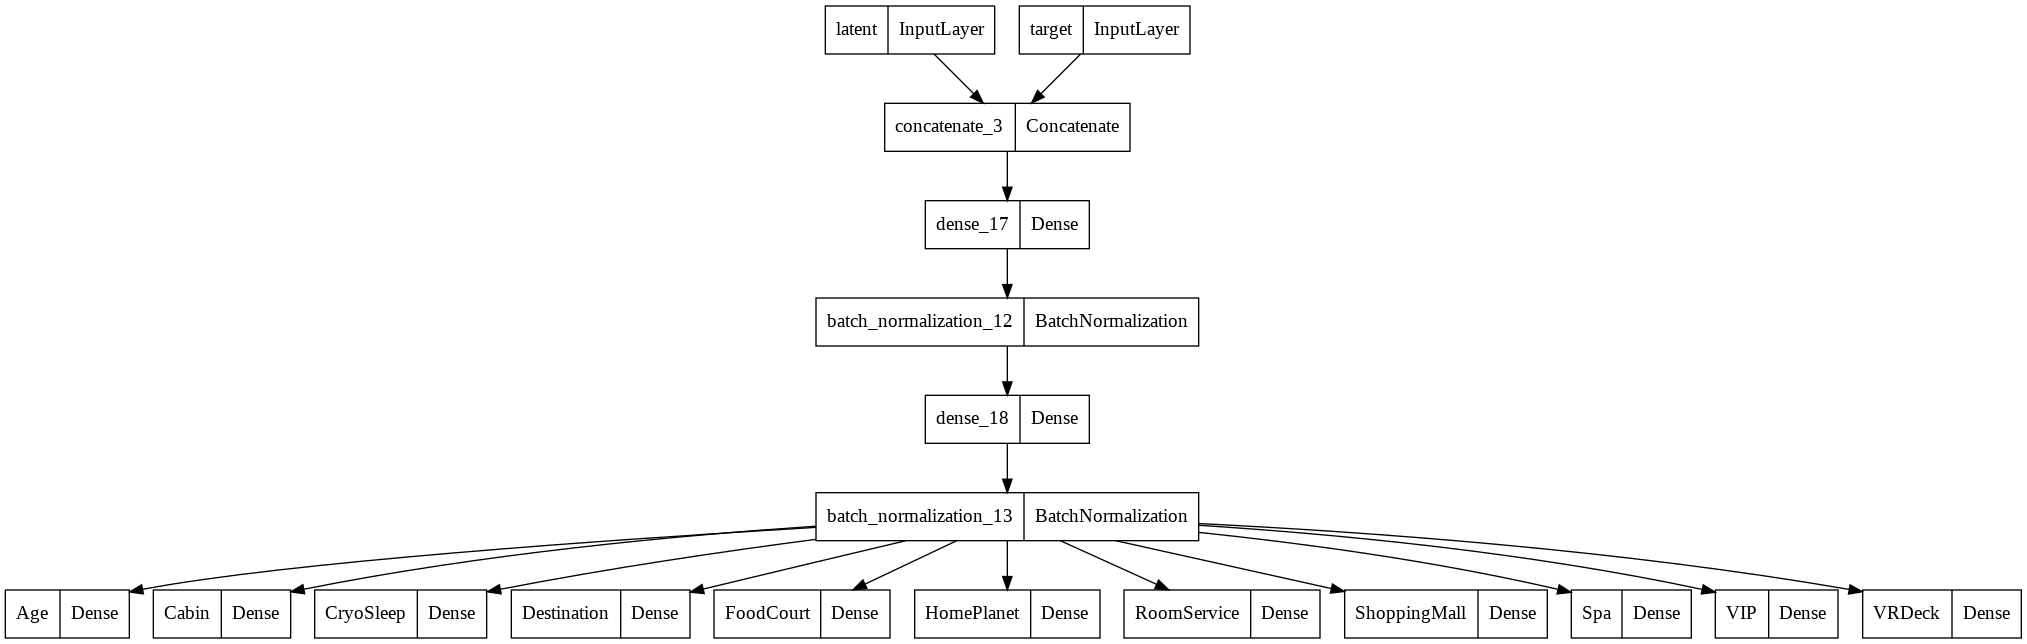

In [ ]:
from keras.utils import plot_model
plot_model(generator, to_file='generator.png')

Discriminator

In [ ]:
inputs = {}
numeric_nets = []
string_nets = []

In [ ]:
#numerical data inputs
for name in numeric_data:
    numeric_input = Input(shape=(1,),name=name)
    inputs[name] = numeric_input
    
    numeric_net = GaussianNoise(0.01)(numeric_input)
    numeric_nets.append(numeric_net)

In [ ]:
#string data inputs
for name,n_token in n_tokens.items():
    string_input = Input(shape=(n_token,),name=name)
    inputs[name] = string_input

    string_net = GaussianNoise(0.05)(string_input)
    string_net = Dense(n_embeddings[name],activation='relu',
                        kernel_initializer='he_uniform')(string_net)
    string_nets.append(string_net)

In [ ]:
string_nets = Concatenate()(string_nets)
string_nets = BatchNormalization()(string_nets)
string_nets = [Dense(len(string_data),activation='relu',
                        kernel_initializer='he_uniform')(string_nets)]

In [ ]:
net = Concatenate()(numeric_nets + string_nets)
net = BatchNormalization()(net)

In [ ]:
for _ in range(2):
    net = Dense(64+len(data), activation='relu',
                kernel_initializer='he_uniform')(net)
    net = BatchNormalization()(net)

In [ ]:
#discrimination/classification
outputs = Dense(3, activation='softmax',
                kernel_initializer='glorot_uniform')(net)

discriminator = Model(inputs=inputs, outputs=outputs)
discriminator.compile(loss='categorical_crossentropy',
                        optimizer=Nadam(clipnorm=1.))

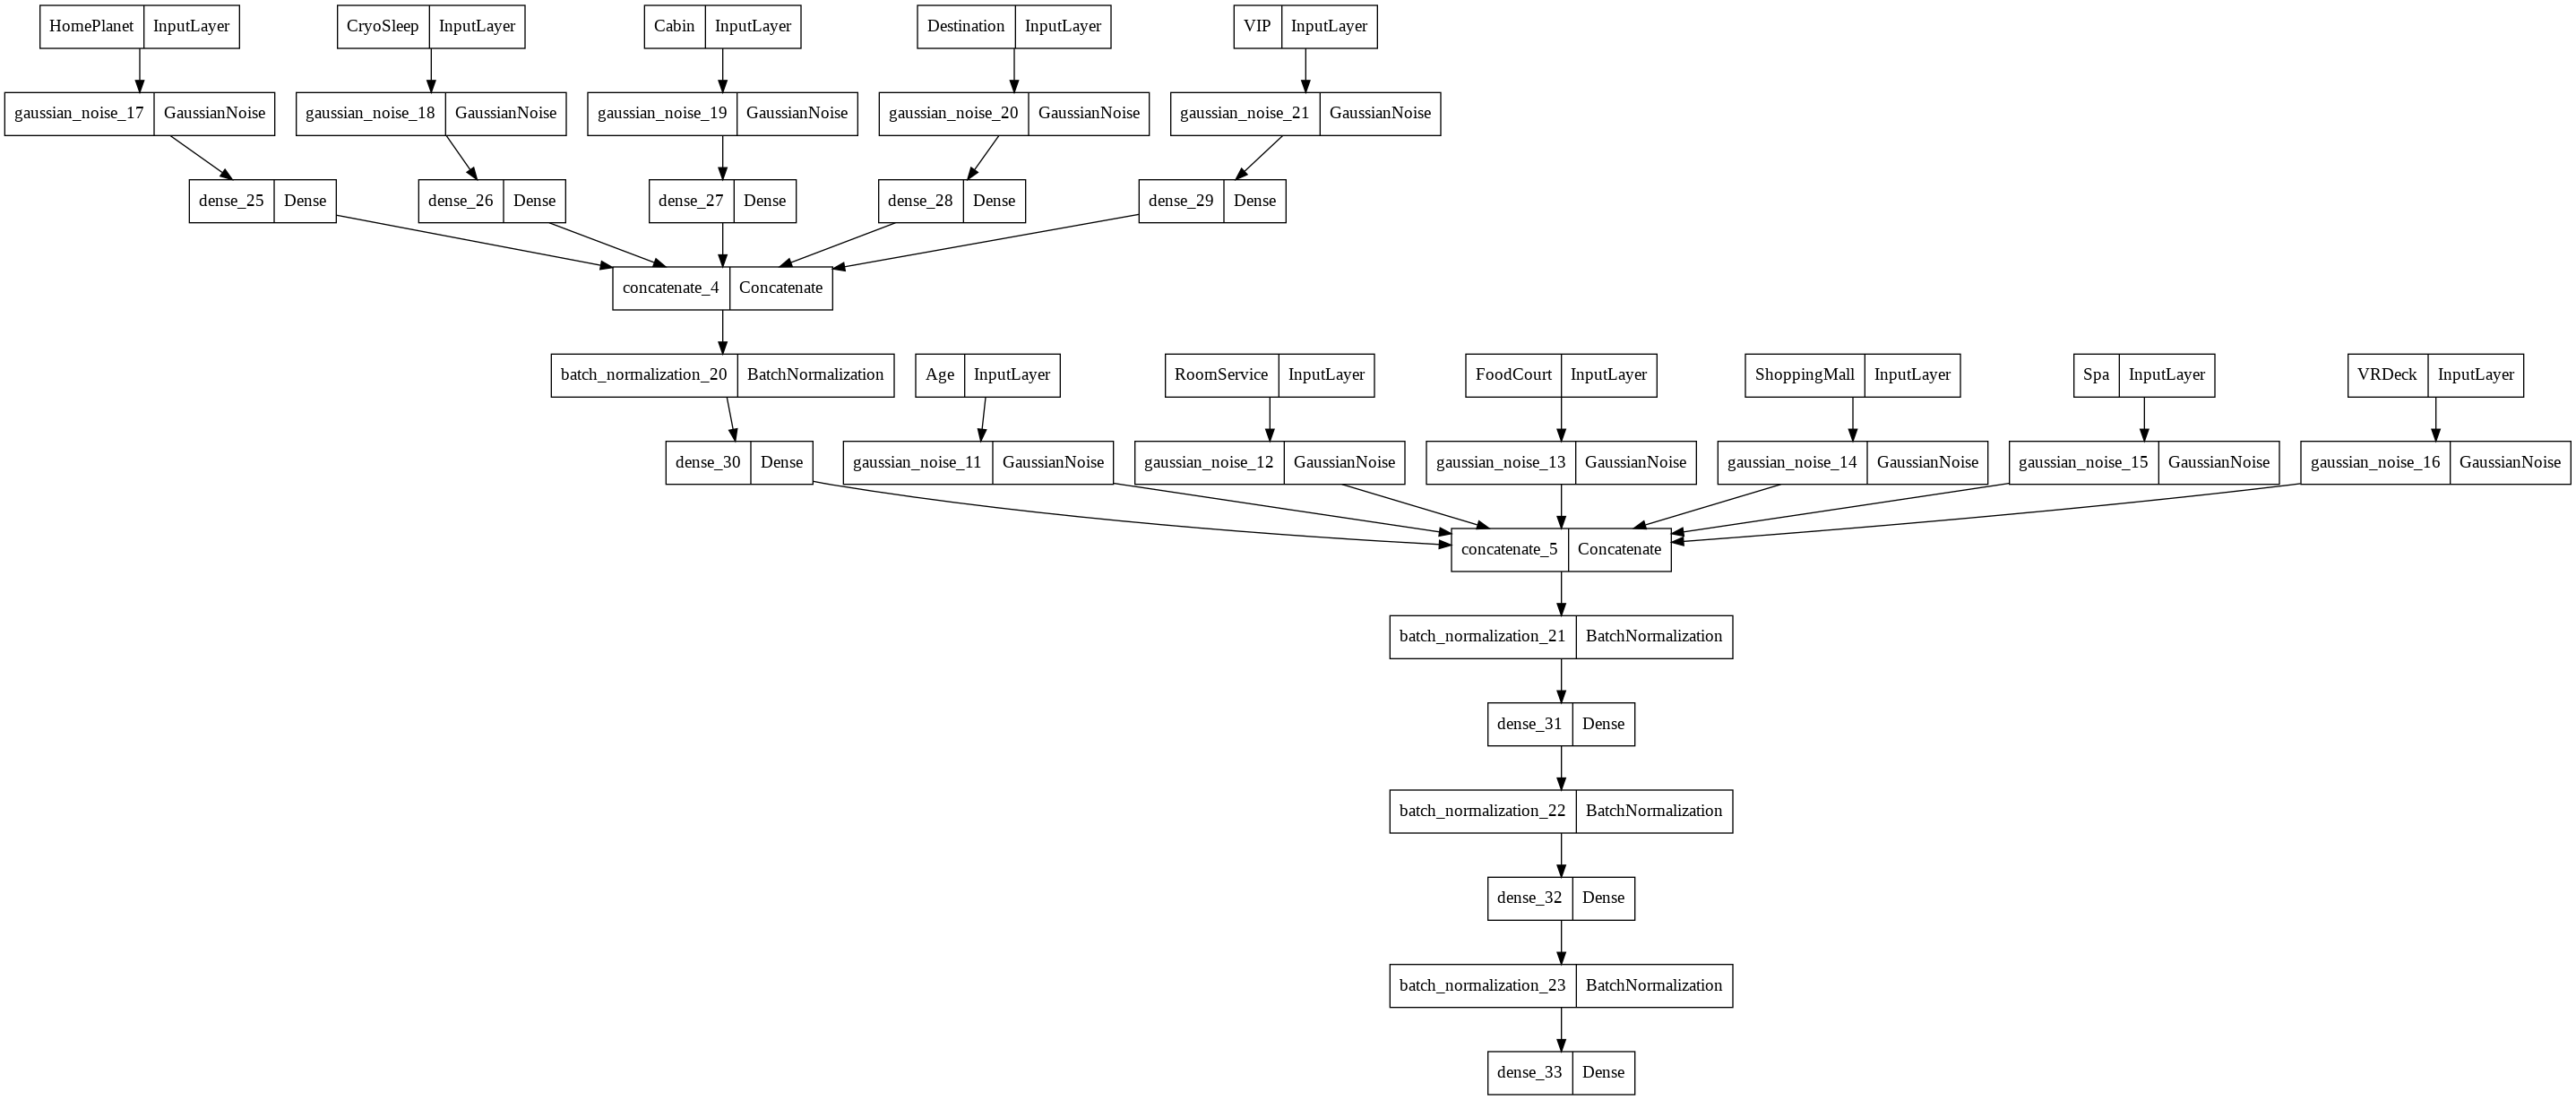

In [ ]:
plot_model(discriminator, to_file='discriminator.png')

Gan network

In [ ]:
#disable discriminator training
discriminator.trainable = False


In [ ]:
#input for random seed vecotors
latent_inputs = Input(shape=(latent_dim,),name='latent')
#input for target specification
target_inputs = Input(shape=(2,),name='target')

inputs = {'latent':latent_inputs,'target':target_inputs}

net = generator([latent_inputs, target_inputs])
outputs = discriminator(net)

gan = Model(inputs=inputs, outputs=outputs)
gan.compile(loss='categorical_crossentropy', optimizer=Nadam(clipnorm=1.))

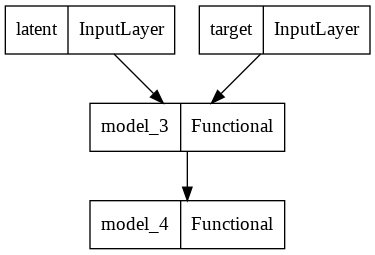

In [ ]:
plot_model(gan, to_file='gan.png')

In [ ]:
from tensorflow.keras.utils import to_categorical   

#function for generating latent samples for synthetic data for generator training
def generate_latent_samples(n):
    
    #generate latent vectors with balanced targets
    x = {'latent': np.random.normal(size=(n, latent_dim)),
         'target': to_categorical(np.hstack([np.array([_x for _ in range(n//2)]) for _x in range(2)]),2)}
    
    #outputs indicating postive discirmination (target value)
    y = np.hstack([np.array([[0] for _ in range(n)]), x['target']])

    return x, y

#function for generating synthetic samples for discriminator training
def generate_synthetic_samples(n):
    
    latent_x, _ = generate_latent_samples(n)
    #generate data with balanced targets
    gen_predict = generator.predict(latent_x)

    x = dict(zip(generator.output_names, gen_predict))
    
    #outputs indicating negative discirmination
    y = np.array([[1,0,0] for _ in range(n)])

    return x, y
    
    
#function for generating real samples for discriminator training
def generate_real_samples(n):
    
    #sample real data with balanced targets
    samples = [np.random.choice(train_target_df[train_target_df[target] == _y].index, size=n//2) for _y in range(2)]

    x = {name:np.vstack([train_df[name][sample].values.reshape(-1,1) for y,sample in enumerate(samples)]) for name in data}
    for name,n_token in n_tokens.items():
        x[name] = to_categorical(x[name], n_token)
    
    #outputs indicating postive discirmination (target value)
    y = np.hstack([np.array([[0] for _ in range(n)]),
                   to_categorical(np.hstack([train_target_df[target][sample].values for sample in samples]),2)])

    return x,y

In [ ]:
import itertools
import matplotlib.pyplot as plt

def train_gan(n_epochs,n_batch,n_plot,n_eval):
    
    #discriminator/generator training logs
    disc_loss_hist = []
    gen_loss_hist = []

    for epoch in range(n_epochs):
        if epoch%100 == 0:
            print(epoch,end=' ')
        
        #enable discriminator training
        discriminator.trainable = True
        
        #sample equal portions of real/synthetic data
        x_real, y_real = generate_real_samples(int(n_batch / 2))
        x_synth, y_synth = generate_synthetic_samples(int(n_batch / 2))
          
        x_total = {}
        for key in x_real.keys():
            print(x_real[key])
            print(x_synth[key])
            x_total[key] = np.vstack([x_real[key],x_synth[key]])
        
        y_total = np.vstack([y_real,y_synth])            
        
        #train discriminator
        hist = discriminator.train_on_batch(x_total, y_total)
        disc_loss_hist.append(hist)

        discriminator.trainable = False
        
        x_gan, y_gan = generate_latent_samples(n_batch)
        
        #train generator
        hist = gan.train_on_batch(x_gan, y_gan)
        gen_loss_hist.append(hist)                               
        
        #after set number of epochs, evaluate GAN training progress
        if (epoch+1) % n_eval == 0:
            print('\n')
            
            #pull real and synthetic data to compare distributions and relationships
            x_real, _ = generate_real_samples(int(n_plot / 2))
            x_synth, _ = generate_synthetic_samples(int(n_plot / 2))
            
            for name,n_token in n_tokens.items():
                x_real[name] = x_real[name].argmax(1).reshape(-1,1)
                x_synth[name] = x_synth[name].argmax(1).reshape(-1,1)

            print('numeric data')
            for i,name1 in enumerate(numeric_data):
                print(name1)
                plt.hist([x_real[name1].flatten(),x_synth[name1].flatten()],
                         bins=16) #compare data distributions
                plt.legend(['Real','Synthetic'])
                plt.show()
                
                for name2 in numeric_data[i+1:]:
                    print(name1,name2)
                    plt.scatter(x_real[name1],x_real[name2],s=1) #compare data realtionships
                    plt.scatter(x_synth[name1],x_synth[name2],s=1)
                    plt.legend(['Real','Synthetic'])
                    plt.show()
            
            print('string data')
            for i,name1 in enumerate(string_data):
                print(name1)
                plt.hist([x_real[name1].flatten(),x_synth[name1].flatten()],
                         bins=n_tokens[name1]) #compare data distributions
                plt.legend(['Real','Synthetic'])
                plt.show()
                
                for name2 in string_data[i+1:]:
                    print(name1,name2)
                    #create numerical index to represent combinations of tokens
                    lookup = {tup:p for p,tup in enumerate(itertools.product(range(n_tokens[name1]),
                                                                             range(n_tokens[name2])))}
                    hist_real = [lookup[tuple(x)] for x in np.hstack([x_real[name1],x_real[name2]])]
                    hist_synth = [lookup[tuple(x)] for x in np.hstack([x_synth[name1],x_synth[name2]])]
                    
                    plt.hist([hist_real,hist_synth],
                             bins=len(set(hist_real+hist_synth)),
                             color=['blue','orange']) #compare data realtionships
                    
                    plt.legend(['Real','Synthetic'])
                    plt.show()
            
            #plot loss history
            print('loss history')
            plt.plot(disc_loss_hist,linewidth=2)
            plt.plot(gen_loss_hist,linewidth=2)
            plt.legend(['Discriminator','Generator'])
            plt.show()
            print('\n')


n_epochs = 3000
n_batch = 1024*16
n_eval = 500
n_plot = 2048

train_gan(n_epochs,n_batch,n_plot,n_eval)

256/256 [==============================] - 42s 166ms/step
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
helloo
VRDeck


ValueError: ignored

In [ ]:
#train classifer with real and synthetic data for 1000 epochs
for _ in range(1000):
    #split batch into half real and half synthetic data
    x_real, y_real = generate_real_samples(batch_size//2)
    x_synth, y_synth = generate_synthetic_samples(batch_size//2)

    x_total = {}
    for key in x_real.keys():
        x_total[key] = np.vstack([x_real[key],x_synth[key]])
    y_total = np.vstack([y_real,y_synth])            
        
    gan_classifier.train_on_batch(x_total,y_total[:,1:])
    
#setup of test data for evaluating classifier results
test_inputs = {}

for name in numeric_data:
    test_inputs[name] = test_df[[name]].values
for name in string_data:
    test_inputs[name] = to_categorical(test_df[name].values,n_tokens[name])
    
test_outputs = to_categorical(test_target_df[target].values,2)

gan_classifier_eval = gan_classifier.evaluate(test_inputs,test_outputs)
print('gan classifier accuracy:',gan_classifier_eval[1])